In [37]:
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
import timeit

In [38]:
def MNSE(Y_known, Y_un):
    return np.linalg.norm(Y_known-Y_un)/np.linalg.norm(Y_known)

In [39]:
electricity = pd.read_table('LD2011_2014.txt', sep=';', decimal=',')

In [40]:
# transpose and sum by hours
data = electricity.values[:,1:].T.reshape((35064*370,4)).sum(axis=1).reshape((370,35064))[:,10064:].astype(float)[:, -750:]
data.shape


(370, 750)

In [41]:
mp=0.1
mask1 = (np.random.random(data.shape) > mp).astype(int)
data_missing1 = data.copy()
data_missing1[mask1 == 0] = np.nan

mp=0.2
mask2 = (np.random.random(data.shape) > mp).astype(int)
data_missing2 = data.copy()
data_missing2[mask2 == 0] = np.nan

mp=0.3
mask3 = (np.random.random(data.shape) > mp).astype(int)
data_missing3 = data.copy()
data_missing2[mask3 == 0] = np.nan

mp=0.4
mask4 = (np.random.random(data.shape) > mp).astype(int)
data_missing4 = data.copy()
data_missing4[mask4 == 0] = np.nan

mp=0.5
mask5 = (np.random.random(data.shape) > mp).astype(int)
data_missing5 = data.copy()
data_missing5[mask5 == 0] = np.nan


# TPMF

In [42]:
#Define mask function
def mask(Y):
    '''
    creates mask for data matrix Y - can be called later for any construction
    '''
    M = np.ones_like(Y)
    where_are_NaNs = np.isnan(Y)
    M[where_are_NaNs] = 0
    return M

def mask2(Y):
    where_are_NaNs = np.isnan(Y)
    Y[where_are_Nanas] = 0
    return Y


In [25]:
def update_C(C, yk, xk, lam_c, mk):
    C = C + np.nan_to_num(np.multiply(mk.reshape(370, 1), np.outer(yk - C @ xk, xk))) / (lam_c + xk.T @ xk)
    return C

def update_X(lam_x, yk, C, xk, mask, mk, r):
    yk1 = np.nan_to_num(np.multiply(mk, yk))
    C1 = np.nan_to_num(np.multiply(mask.reshape(370, 1), C))
    inv = C1.T@C1 + lam_x*np.eye(r)
    top = C1.T@yk1 + lam_x*np.nan_to_num(xk)
    return top/inv
    
    
#C = C + np.outer(Y[:, t] - C @ X[:, t], X[:, t]) / (lam_c + X[:, t].T @ X[:, t])

def gen_fac(Y, r, gamma_c, gamma_x, epochs, Y_known):
    #INITIALISE
    m, n = Y.shape
    C = np.random.normal(0, 2, (m, r))
    X = np.zeros((r, n))
    err = np.zeros(epochs)
    Ynorm = np.linalg.norm(Y_known)
    eps = 1e-8
    lam_x=1/gamma_x
    lam_c=1/gamma_c
    M = mask(Y)
    Y1 = M*Y
 
    for i in range(epochs):
        #NORMAL COMPUTATION FOR X0

        X[:, 0] = np.linalg.inv(C.T@C)@C.T@(np.nan_to_num(Y[:, 0]))
        for t in range(1, n):
            mk = M[:, t]
            mC = np.hstack([mk]*r)
            X[:, t] = update_X(lam_x, Y[:, t], C, X[:, t-1], mC, mk, r)
            C = update_C(C, Y[:, t], X[:, t], lam_c, mk)
        Y_rec = C @ X
        err[i] = np.linalg.norm(Y-Y_rec)/Ynorm
        if i % 100 == 0:
            #print(Y_rec)

            fig, axs = plt.subplots(3, 1, figsize=(7, 7))
            axs[0].cla()
            axs[0].plot(Y[0, :])
            axs[0].plot(Y_rec[0, :])
            axs[0].set_title('Y[0, :]')
            axs[2].cla()
            axs[2].plot(Y[1, :])
            axs[2].plot(Y_rec[1, :])
            axs[2].set_title('Y[1, :]')
            axs[1].cla()
            axs[1].plot(Y[2, :])
            axs[1].plot(Y_rec[2, :])
            axs[1].set_title('Y[2, :]')
            plt.show(block=False)
            plt.pause(0.1)
            
    return C, X, err


In [36]:
MNSE(data, C1@X1)


0.2052580871673814

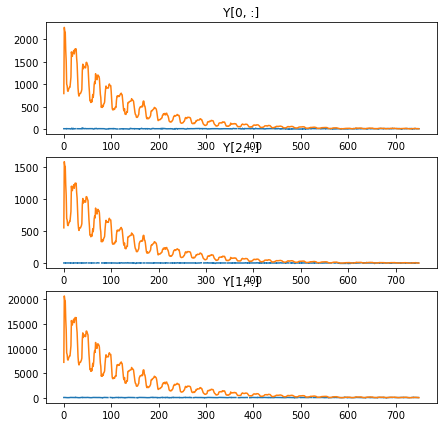

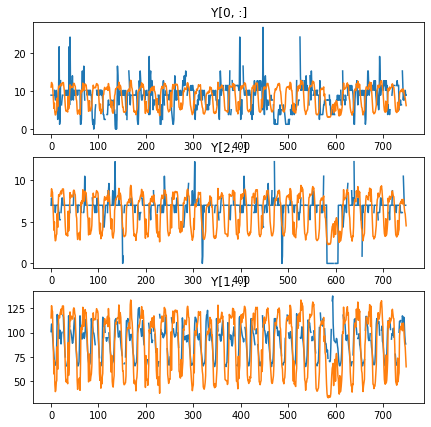

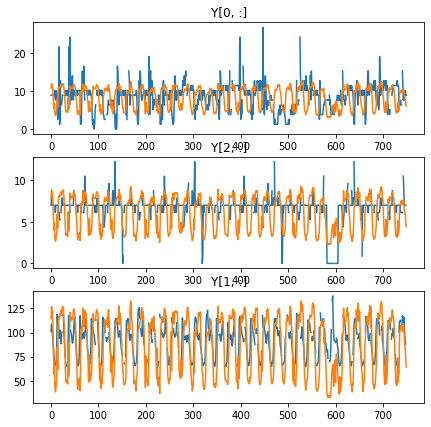

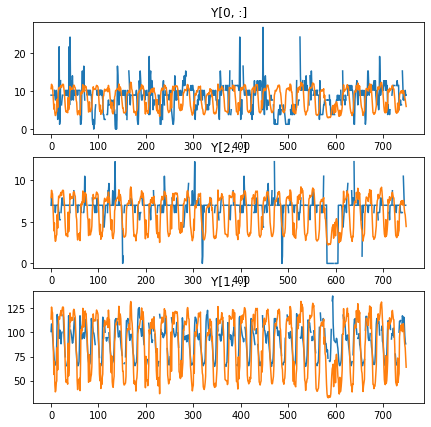

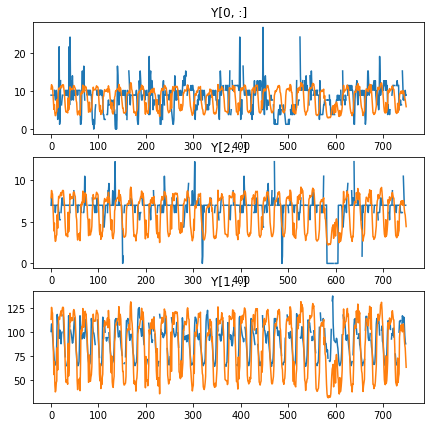

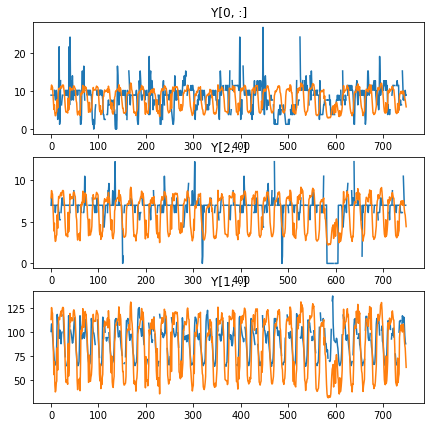

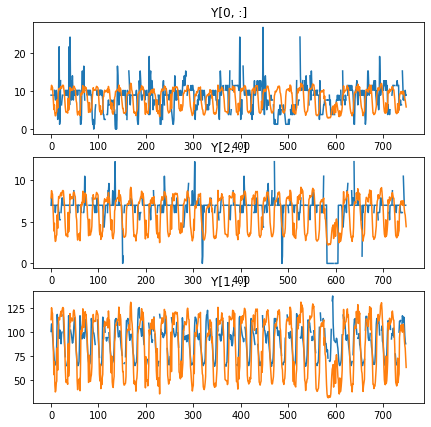

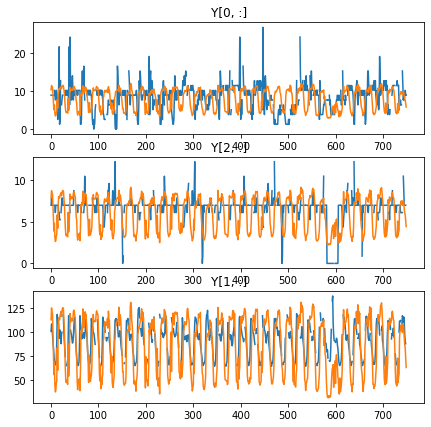

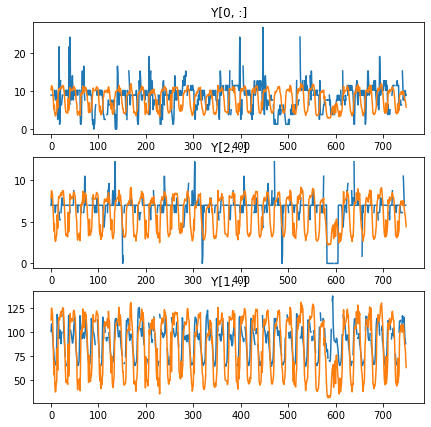

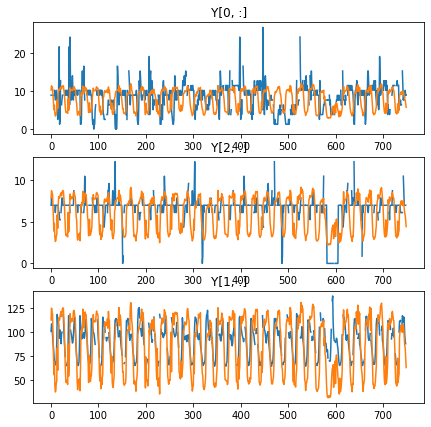

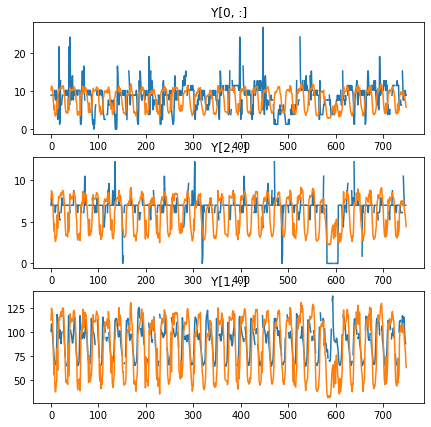

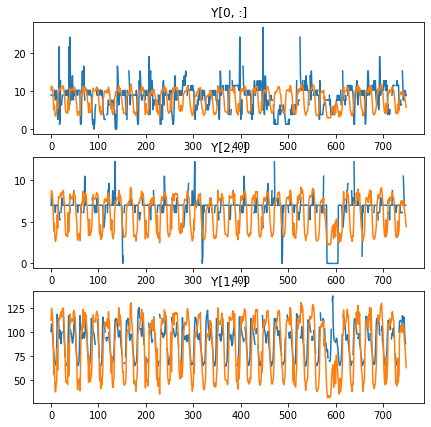

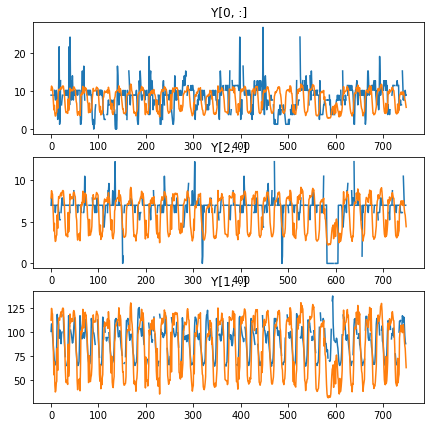

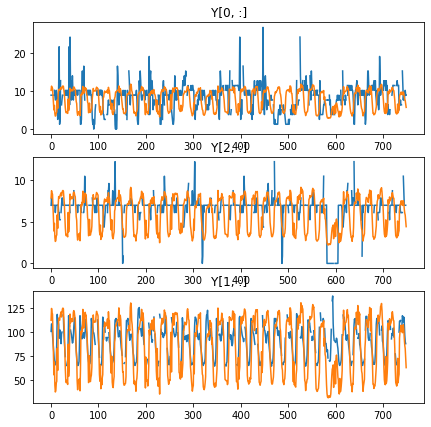

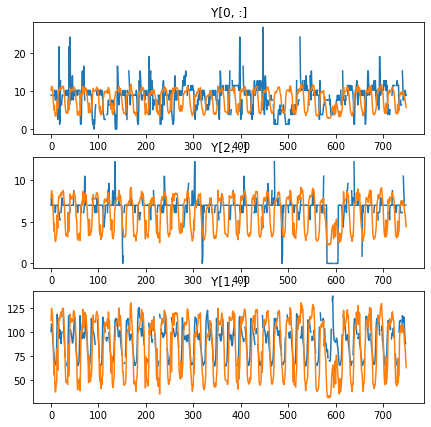

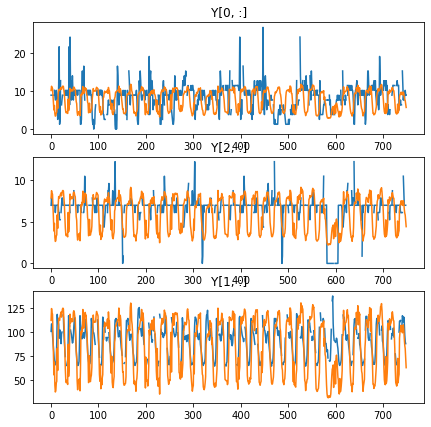

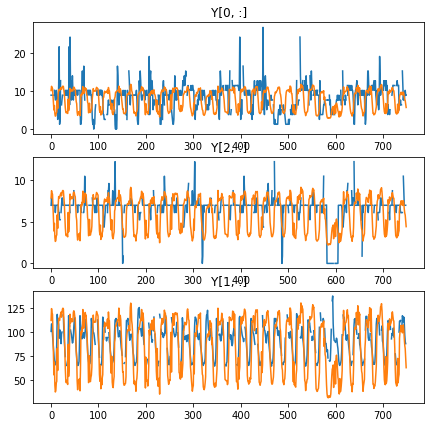

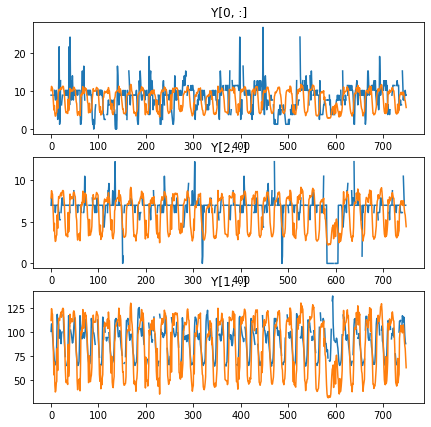

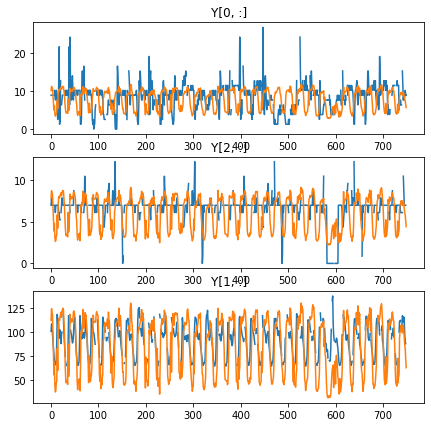

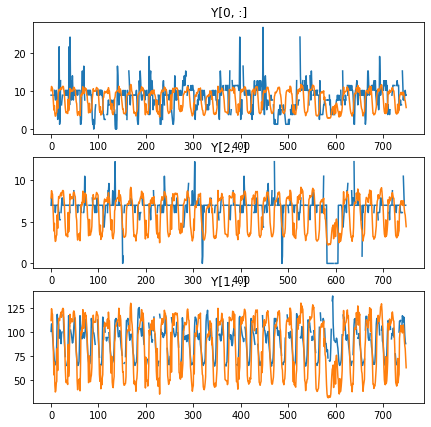

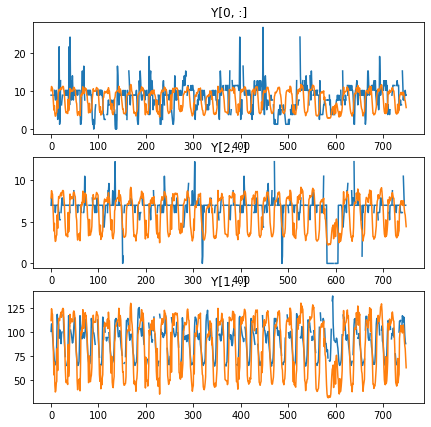

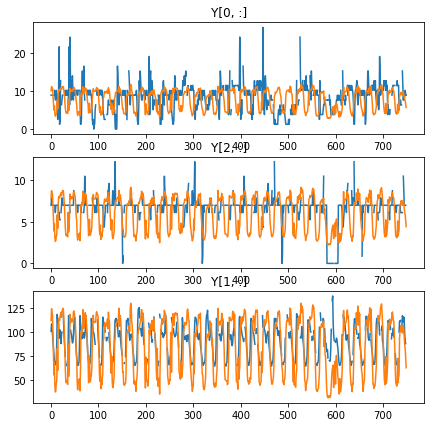

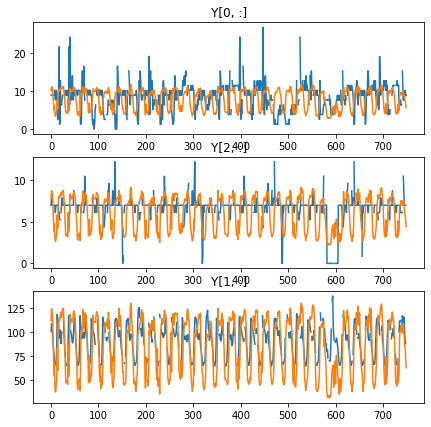

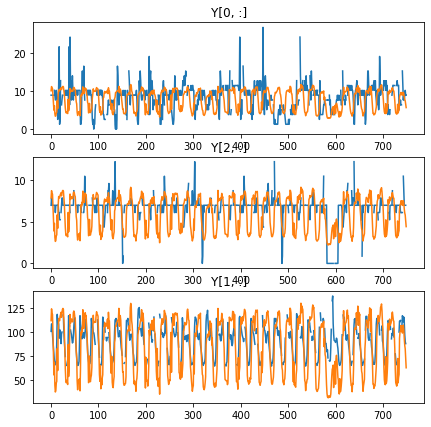

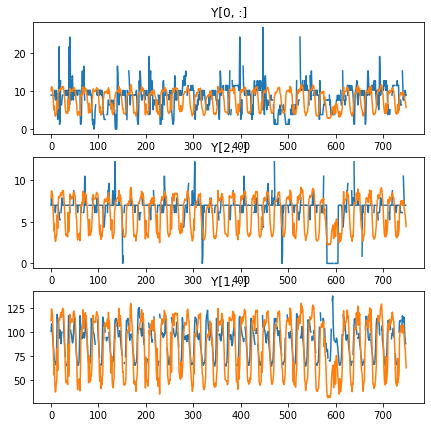

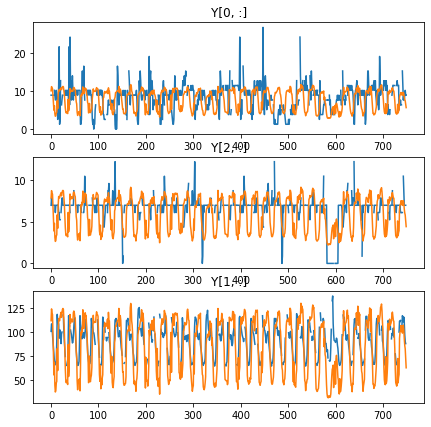

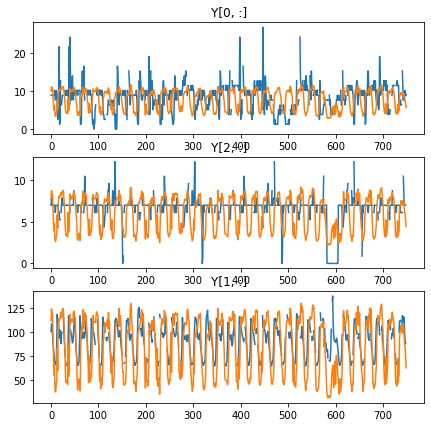

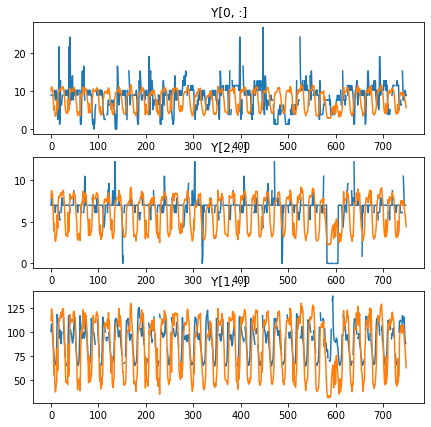

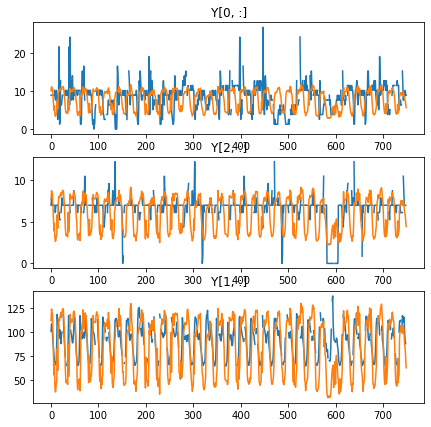

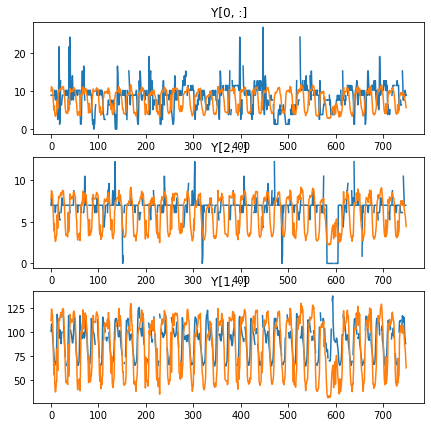

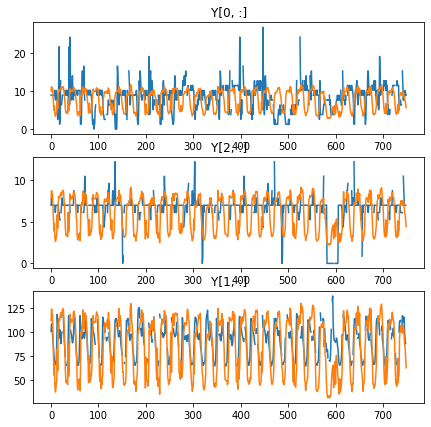

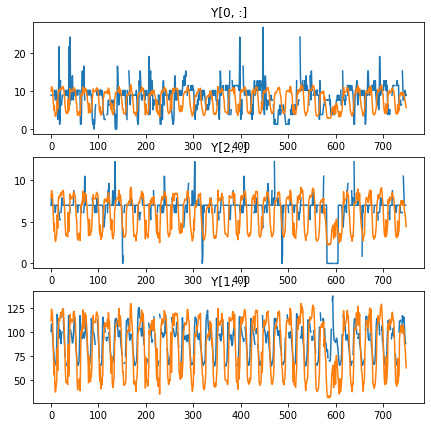

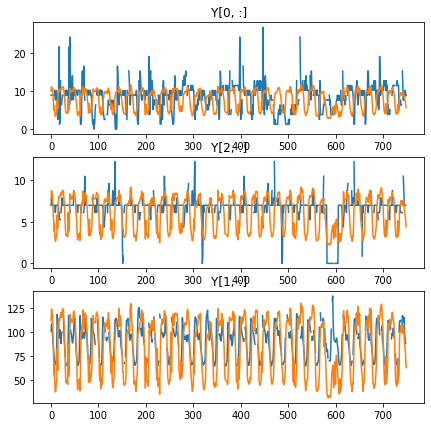

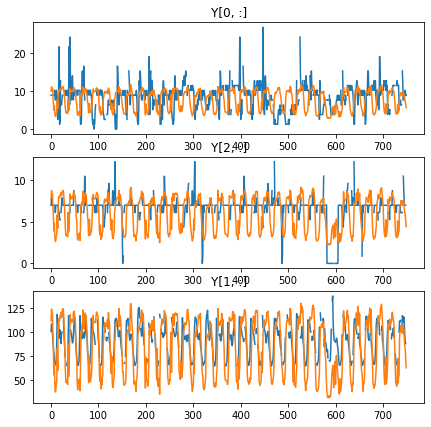

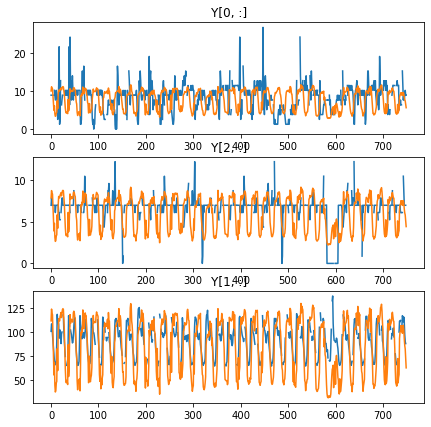

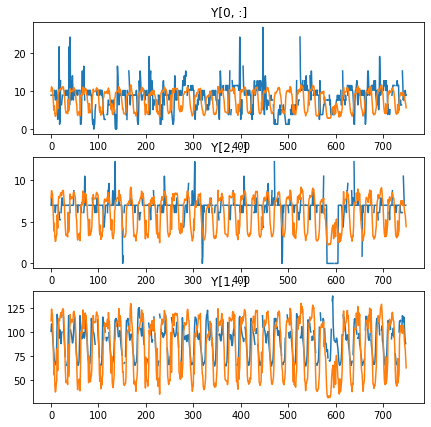

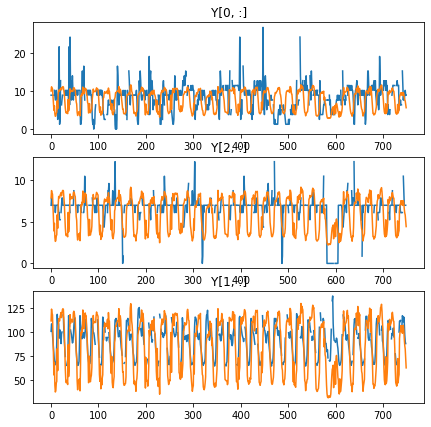

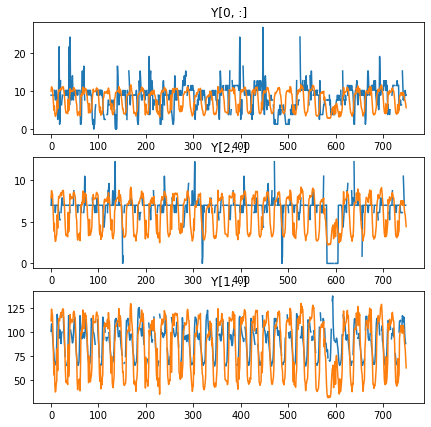

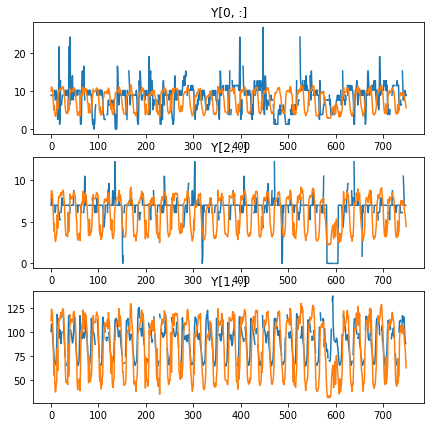

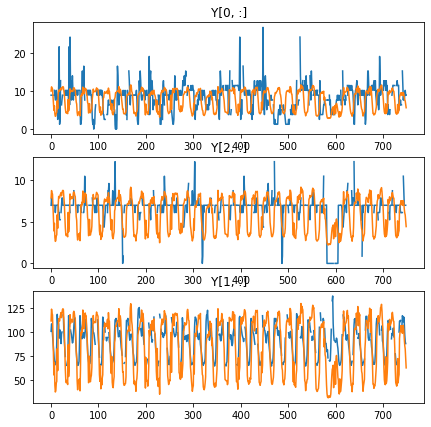

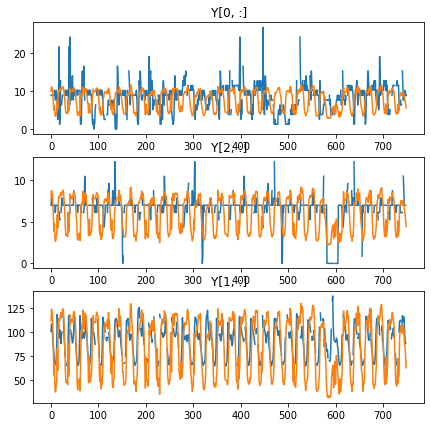

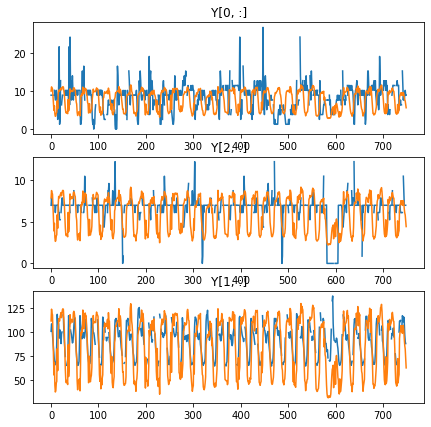

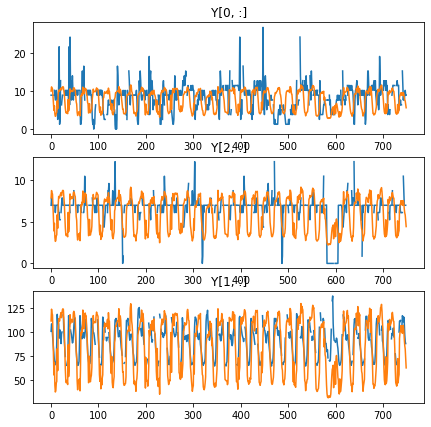

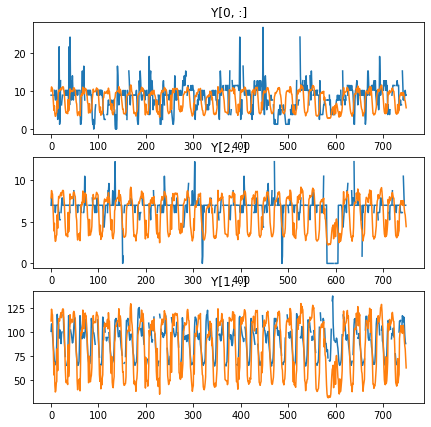

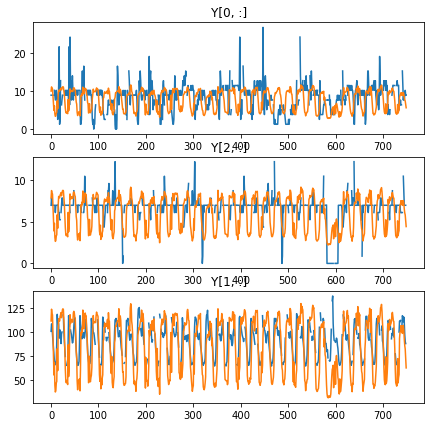

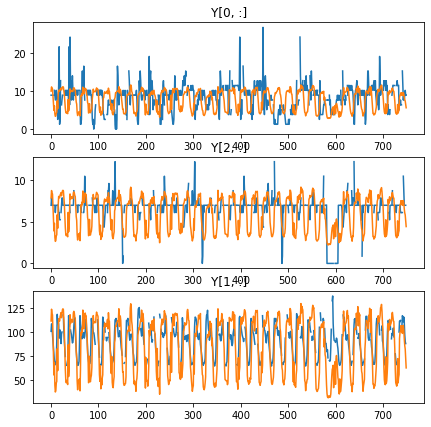

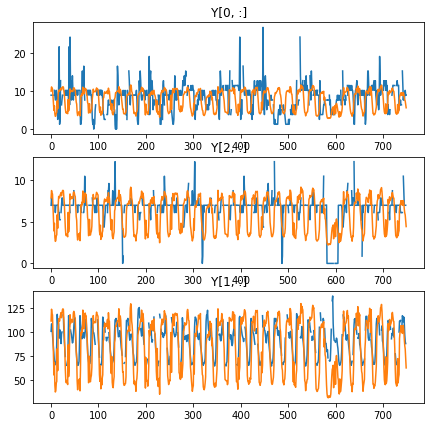

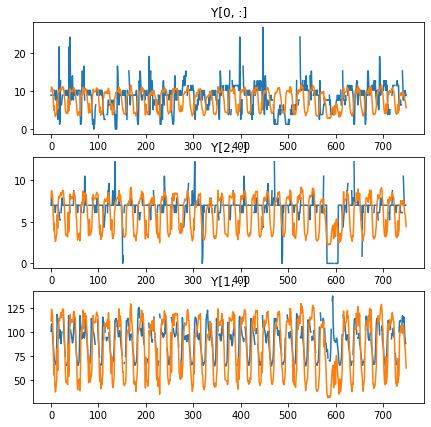

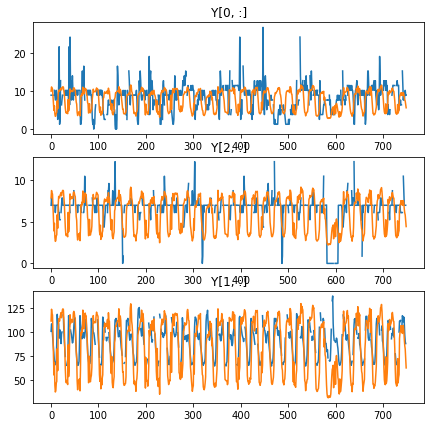

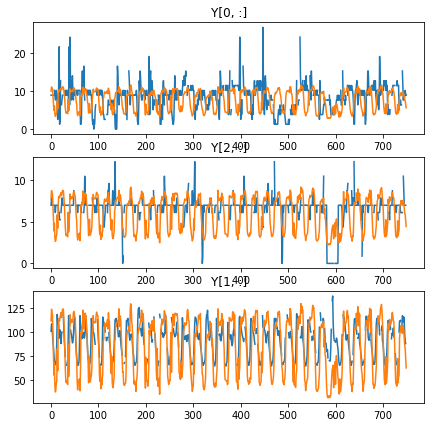

0.2052580871673814

In [26]:
start = timeit.timeit()
C1, X1, err1 = gen_fac(data_missing1, 1, 1, 1, 5000, data)
end = timeit.timeit()

MNSE(data, C1@X1)


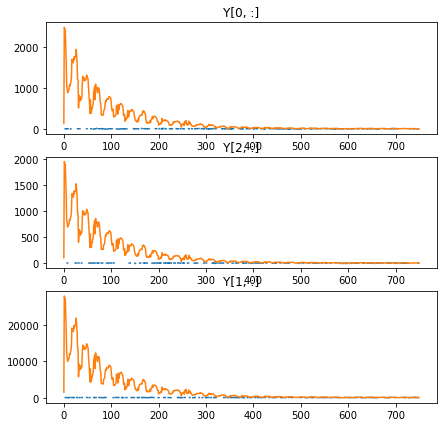

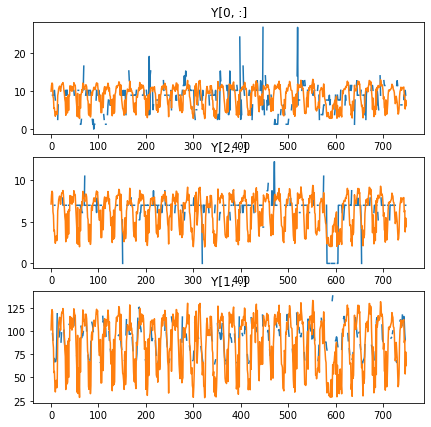

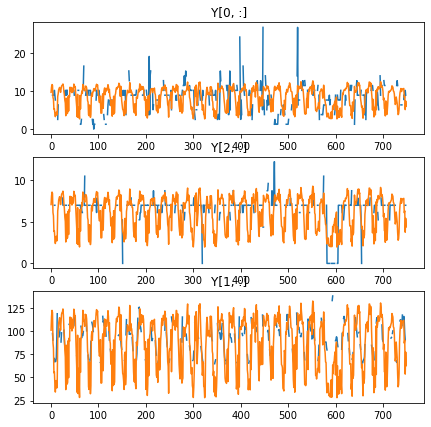

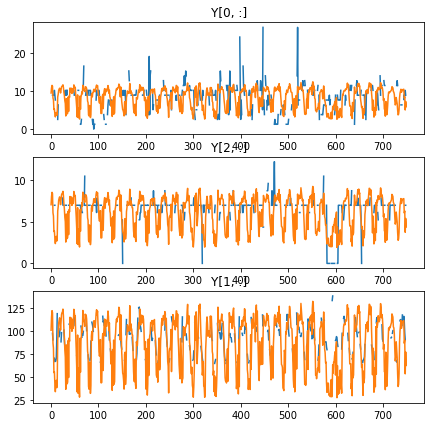

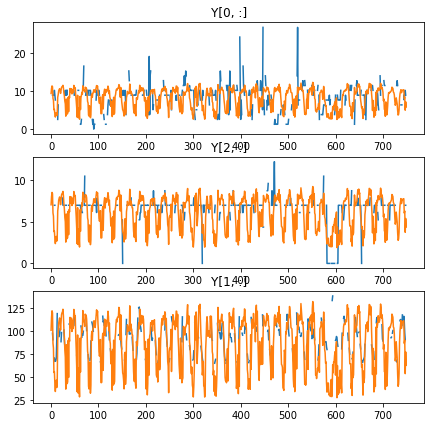

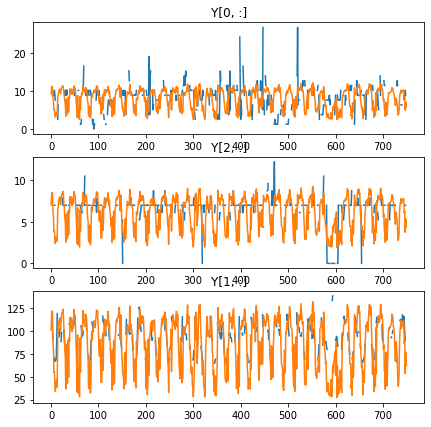

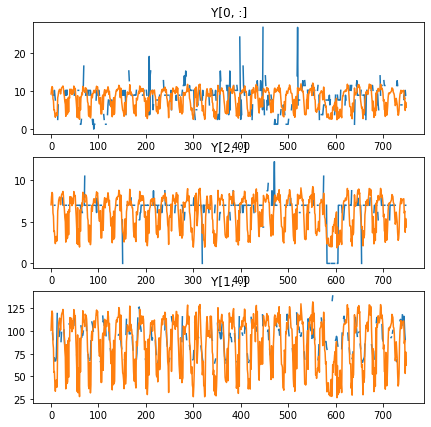

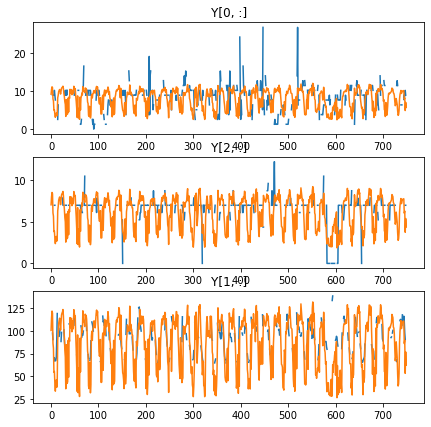

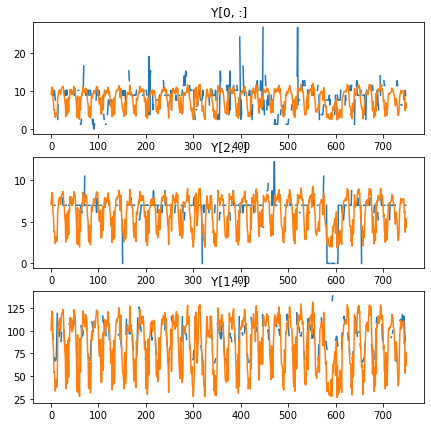

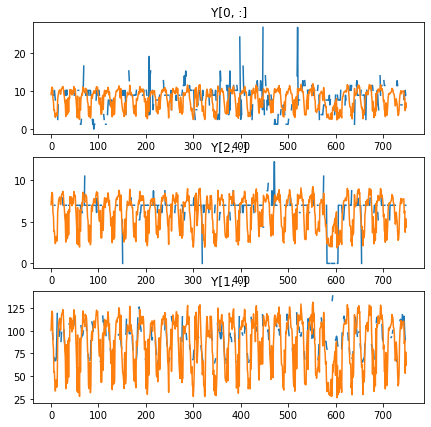

0.002915230999860796


0.2430199242551974

In [29]:
start = timeit.timeit()
C2, X2, err2 = gen_fac(data_missing2, 1, 1, 1, 1000, data)
end = timeit.timeit()
print(start-end)

MNSE(data, C2@X2)

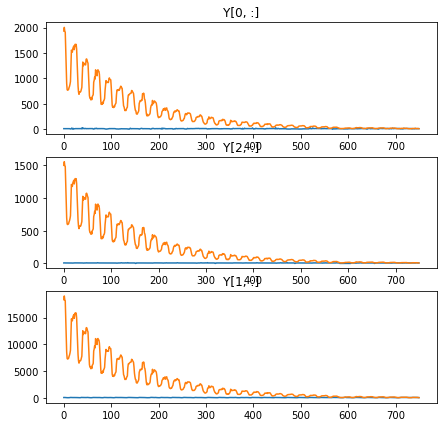

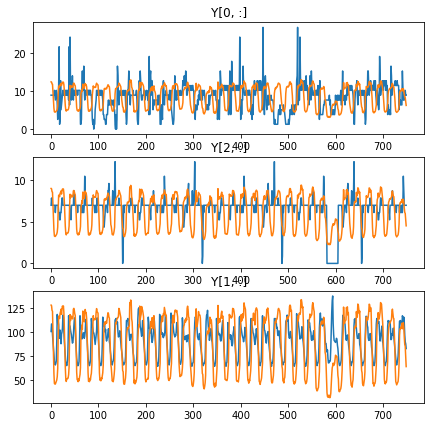

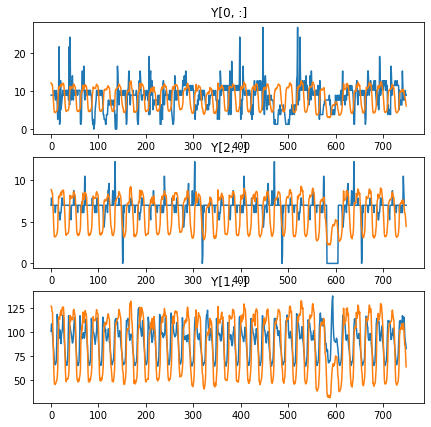

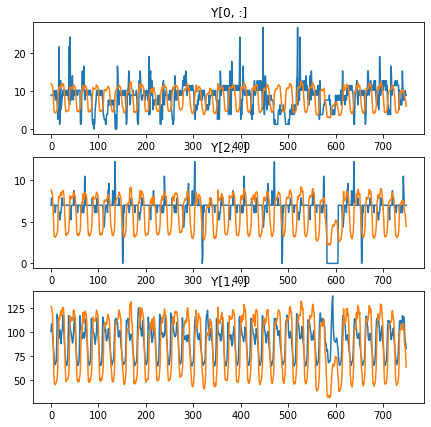

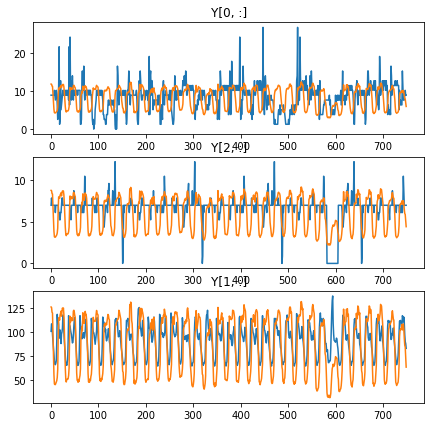

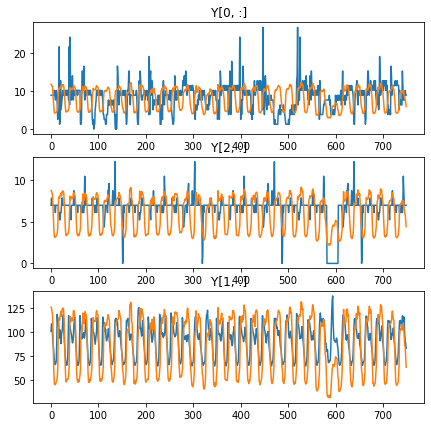

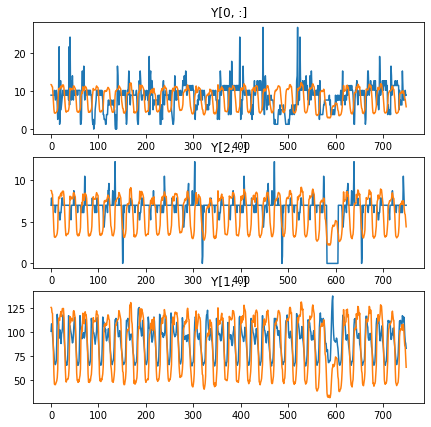

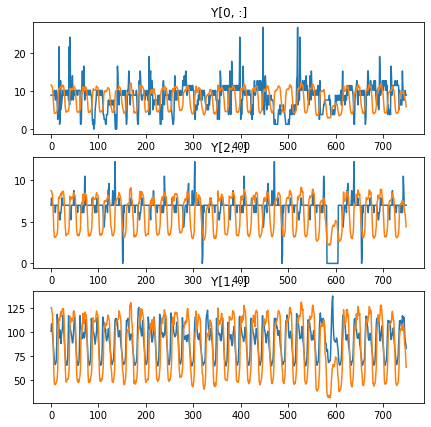

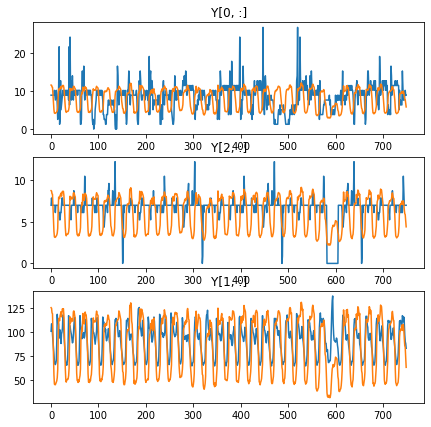

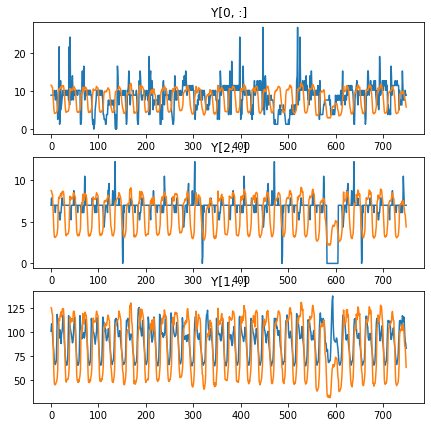

0.005161703003977891


0.19470399707405422

In [35]:
start = timeit.timeit()
C3, X3, err3 = gen_fac(data_missing3, 1, 1, 1, 1000, data)
end = timeit.timeit()
print(start-end)

MNSE(data, C3@X3)

In [33]:
MNSE(data, C4@X4)

0.23684241614419163

In [34]:
MNSE(data, C5@X5)

0.24464154117044798

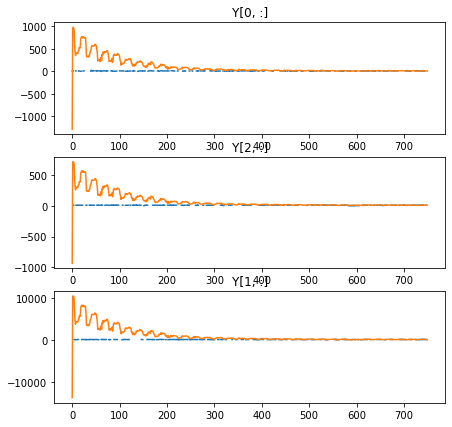

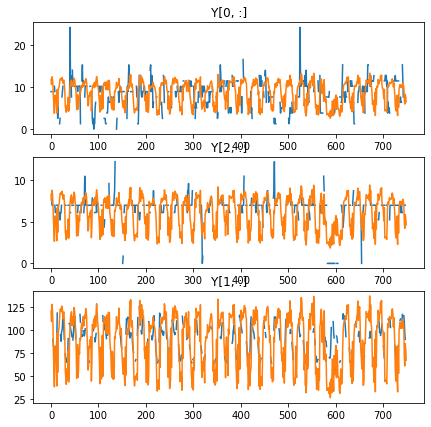

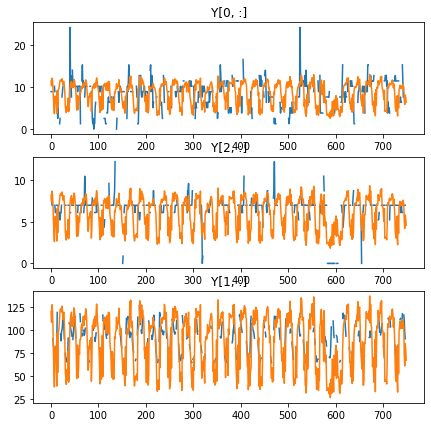

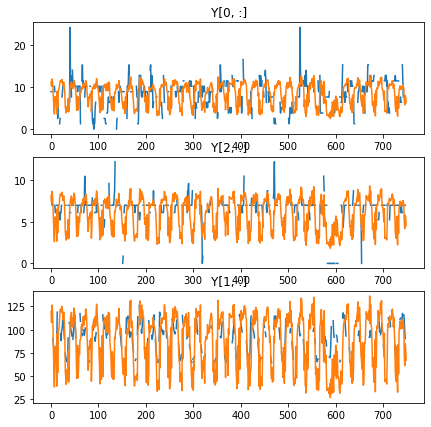

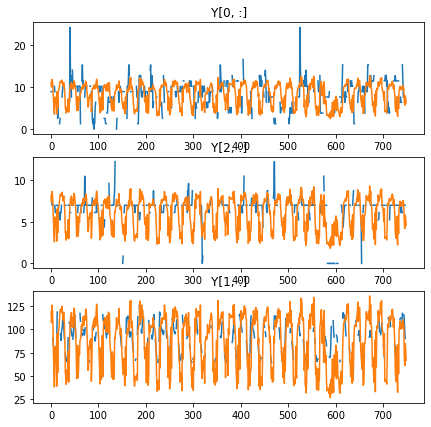

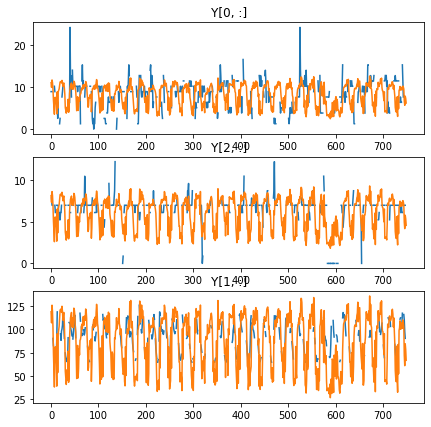

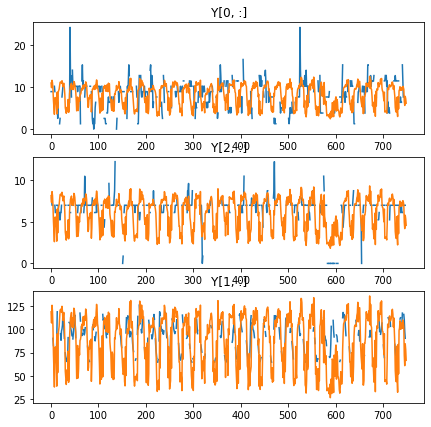

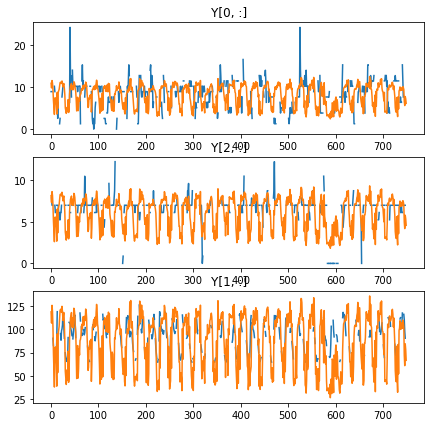

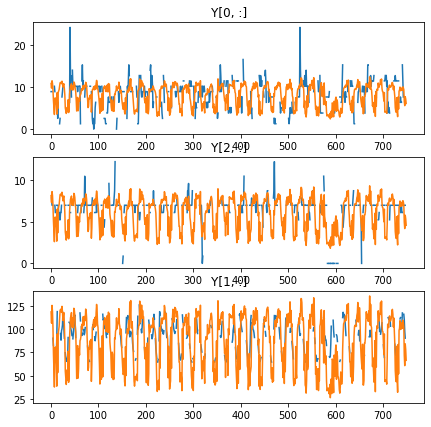

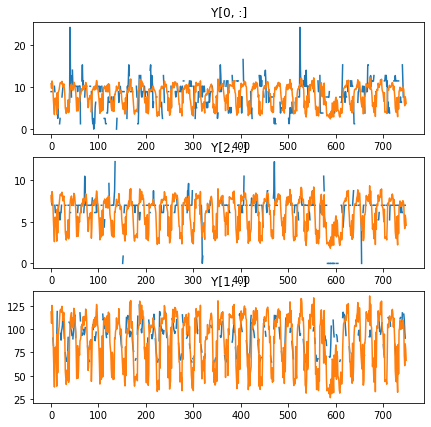

0.008085954000307538


In [30]:
start = timeit.timeit()
C4, X4, err4 = gen_fac(data_missing4, 1, 1, 1, 1000, data)
end = timeit.timeit()
print(start-end)

Y4 = C4@X4

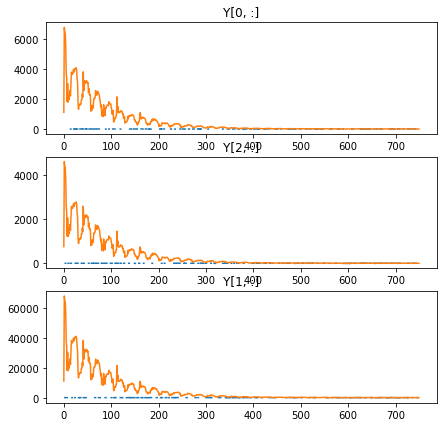

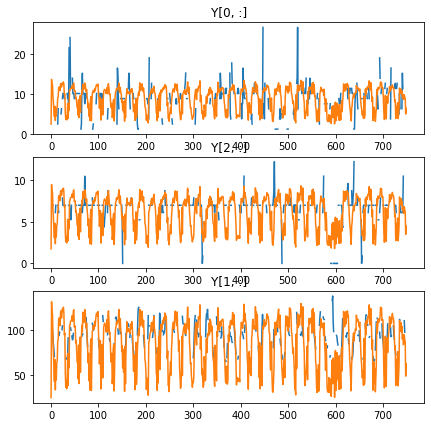

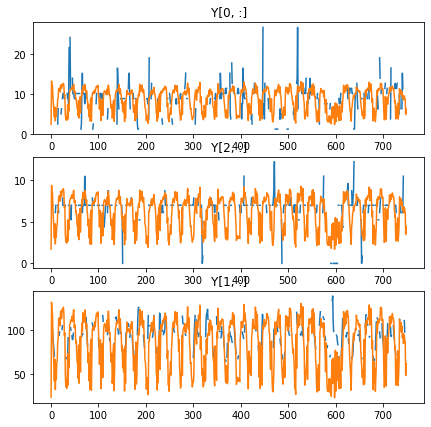

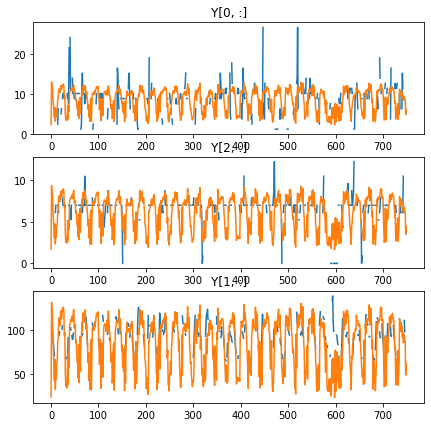

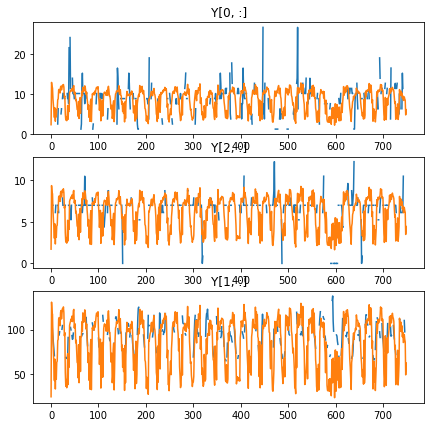

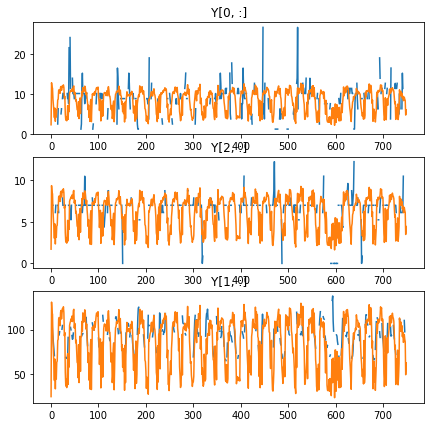

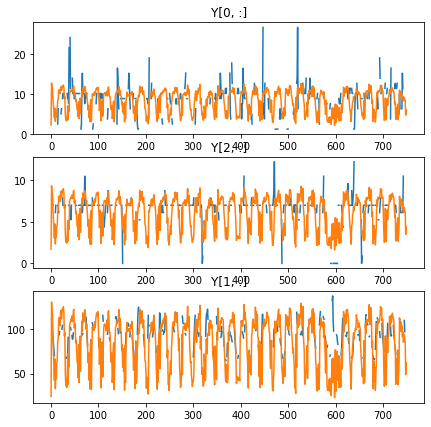

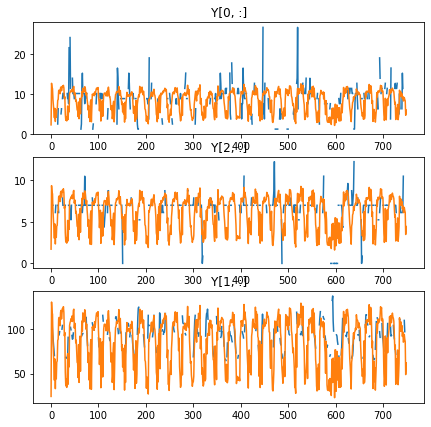

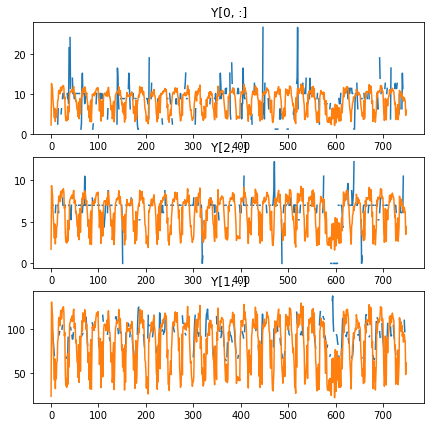

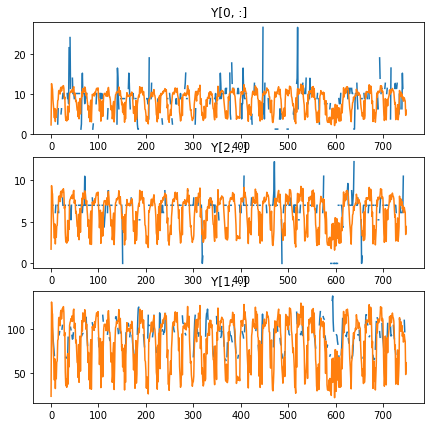

0.006362234999869543


In [31]:
start = timeit.timeit()
C5, X5, err5 = gen_fac(data_missing5, 1, 1, 1, 1000, data)
end = timeit.timeit()
print(start-end)

Y5 = C5@X5

# nmf 

In [53]:
mp=0.1
mask1 = (np.random.random(data.shape) > mp).astype(int)
data_missing1 = data.copy()
data_missing1[mask1 == 0] = np.nan

mp=0.2
mask2 = (np.random.random(data.shape) > mp).astype(int)
data_missing2 = data.copy()
data_missing2[mask2 == 0] = np.nan

mp=0.3
mask3 = (np.random.random(data.shape) > mp).astype(int)
data_missing3 = data.copy()
data_missing2[mask3 == 0] = np.nan

mp=0.4
mask4 = (np.random.random(data.shape) > mp).astype(int)
data_missing4 = data.copy()
data_missing4[mask4 == 0] = np.nan

mp=0.5
mask5 = (np.random.random(data.shape) > mp).astype(int)
data_missing5 = data.copy()
data_missing5[mask5 == 0] = np.nan

In [47]:
def update_W(W, X, H, M):
    new = np.multiply(W, ((X @ H.T)) / (np.multiply(M, W@H)@H.T))
    return new

def update_H(W, X, H, M):
    new = np.multiply(H, ((W.T@X)) / (W.T@np.multiply(M, (W@H))))
    return new

In [55]:
data.shape

(370, 750)

In [48]:
def NNMF(X, r, iter):
    #X is a mxn matrix, r is the approximate rank, iter is number of iterations
    m, n = X.shape
    #initialise W, H matrices
    W = np.absolute(np.random.randn(m, r))
    H = np.absolute(np.random.randn(r, n))
    M = mask(X)
    X = np.nan_to_num(X)
    err = np.zeros(iter)
    for i in range(iter):
        #update at each iteration
        W = update_W(W, X, H, M)
        H = update_H(W, X, H, M)
    
    return W, H, err


In [57]:
start = timeit.timeit()
W_1, H_1, err = NNMF(data_missing1, 300, 5000)
end = timeit.timeit()
Y12 = W_1 @ H_1
print(start-end)

/var/folders/wr/dmfpwqrn1hj_6kflfh4h08m80000gn/T/ipykernel_738/3078649293.py:2: RuntimeWarning: invalid value encountered in true_divide
  new = np.multiply(W, ((X @ H.T)) / (np.multiply(M, W@H)@H.T))


0.001227060998644447


In [58]:
start = timeit.timeit()
W_2, H_2, err = NNMF(data_missing2, 300, 5000)
end = timeit.timeit()
Y22 = W_2 @ H_2
print(start-end)

/var/folders/wr/dmfpwqrn1hj_6kflfh4h08m80000gn/T/ipykernel_738/3078649293.py:2: RuntimeWarning: invalid value encountered in true_divide
  new = np.multiply(W, ((X @ H.T)) / (np.multiply(M, W@H)@H.T))


0.005706419000489404


In [59]:
start = timeit.timeit()
W_3, H_3, err = NNMF(data_missing3, 300, 5000)
end = timeit.timeit()
Y32 = W_3 @ H_3
print(start-end)

/var/folders/wr/dmfpwqrn1hj_6kflfh4h08m80000gn/T/ipykernel_738/3078649293.py:2: RuntimeWarning: invalid value encountered in true_divide
  new = np.multiply(W, ((X @ H.T)) / (np.multiply(M, W@H)@H.T))


0.02559390100213932


In [ ]:
start = timeit.timeit()
W_4, H_4, err = NNMF(data_missing4, 300, 5000)
end = timeit.timeit()
Y42 = W_4 @ H_4
print(start-end)

In [ ]:
start = timeit.timeit()
W_5, H_5, err = NNMF(data_missing5, 300, 5000)
end = timeit.timeit()
Y52 = W_5 @ H_5
print(start-end)

In [64]:
class trmf:
    """Temporal Regularized Matrix Factorization.

    Parameters
    ----------
    
    lags : array-like, shape (n_lags,)
        Set of lag indices to use in model.
    
    K : int
        Length of latent embedding dimension
    
    lambda_f : float
        Regularization parameter used for matrix F.
    
    lambda_x : float
        Regularization parameter used for matrix X.
    
    lambda_w : float
        Regularization parameter used for matrix W.

    alpha : float
        Regularization parameter used for make the sum of lag coefficient close to 1.
        That helps to avoid big deviations when forecasting.
    
    eta : float
        Regularization parameter used for X when undercovering autoregressive dependencies.

    max_iter : int
        Number of iterations of updating matrices F, X and W.

    F_step : float
        Step of gradient descent when updating matrix F.

    X_step : float
        Step of gradient descent when updating matrix X.

    W_step : float
        Step of gradient descent when updating matrix W.


    Attributes
    ----------

    F : ndarray, shape (n_timeseries, K)
        Latent embedding of timeseries.

    X : ndarray, shape (K, n_timepoints)
        Latent embedding of timepoints.

    W : ndarray, shape (K, n_lags)
        Matrix of autoregressive coefficients.
    """

    def __init__(self, lags, K, lambda_f, lambda_x, lambda_w, alpha, eta, max_iter=1000, 
                 F_step=0.0001, X_step=0.0001, W_step=0.0001):
        self.lags = lags
        self.L = len(lags)
        self.K = K
        self.lambda_f = lambda_f
        self.lambda_x = lambda_x
        self.lambda_w = lambda_w
        self.alpha = alpha
        self.eta = eta
        self.max_iter = max_iter
        self.F_step = F_step
        self.X_step = X_step
        self.W_step = W_step
        
        self.W = None
        self.F = None
        self.X = None


    def fit(self, train, resume=False):
        """Fit the TRMF model according to the given training data.

        Model fits through sequential updating three matrices:
            -   matrix self.F;
            -   matrix self.X;
            -   matrix self.W.
            
        Each matrix updated with gradient descent.

        Parameters
        ----------
        train : ndarray, shape (n_timeseries, n_timepoints)
            Training data.

        resume : bool
            Used to continue fitting.

        Returns
        -------
        self : object
            Returns self.
        """

        if not resume:
            self.Y = train
            mask = np.array((~np.isnan(self.Y)).astype(int))
            self.mask = mask
            self.Y[self.mask == 0] = 0.
            self.N, self.T = self.Y.shape
            self.W = np.random.randn(self.K, self.L) / self.L
            self.F = np.random.randn(self.N, self.K)
            self.X = np.random.randn(self.K, self.T)

        for _ in range(self.max_iter):
            self._update_F(step=self.F_step)
            self._update_X(step=self.X_step)
            self._update_W(step=self.W_step)


    def predict(self, h):
        """Predict each of timeseries h timepoints ahead.

        Model evaluates matrix X with the help of matrix W,
        then it evaluates prediction by multiplying it by F.

        Parameters
        ----------
        h : int
            Number of timepoints to forecast.

        Returns
        -------
        preds : ndarray, shape (n_timeseries, T)
            Predictions.
        """

        X_preds = self._predict_X(h)
        return np.dot(self.F, X_preds)


    def _predict_X(self, h):
        """Predict X h timepoints ahead.

        Evaluates matrix X with the help of matrix W.

        Parameters
        ----------
        h : int
            Number of timepoints to forecast.

        Returns
        -------
        X_preds : ndarray, shape (self.K, h)
            Predictions of timepoints latent embeddings.
        """

        X_preds = np.zeros((self.K, h))
        X_adjusted = np.hstack([self.X, X_preds])
        for t in range(self.T, self.T + h):
            for l in range(self.L):
                lag = self.lags[l]
                X_adjusted[:, t] += X_adjusted[:, t - lag] * self.W[:, l]
        return X_adjusted[:, self.T:]

    def impute_missings(self):
        """Impute each missing element in timeseries.

        Model uses matrix X and F to get all missing elements.

        Parameters
        ----------

        Returns
        -------
        data : ndarray, shape (n_timeseries, T)
            Predictions.
        """
        data = self.Y
        data[self.mask == 0] = np.dot(self.F, self.X)[self.mask == 0]
        return data


    def _update_F(self, step, n_iter=1):
        """Gradient descent of matrix F.

        n_iter steps of gradient descent of matrix F.

        Parameters
        ----------
        step : float
            Step of gradient descent when updating matrix.

        n_iter : int
            Number of gradient steps to be made.

        Returns
        -------
        self : objects
            Returns self.
        """

        for _ in range(n_iter):
            self.F -= step * self._grad_F()


    def _update_X(self, step, n_iter=1):
        """Gradient descent of matrix X.

        n_iter steps of gradient descent of matrix X.

        Parameters
        ----------
        step : float
            Step of gradient descent when updating matrix.

        n_iter : int
            Number of gradient steps to be made.

        Returns
        -------
        self : objects
            Returns self.
        """

        for _ in range(n_iter):
            self.X -= step * self._grad_X()


    def _update_W(self, step, n_iter=1):
        """Gradient descent of matrix W.

        n_iter steps of gradient descent of matrix W.

        Parameters
        ----------
        step : float
            Step of gradient descent when updating matrix.

        n_iter : int
            Number of gradient steps to be made.

        Returns
        -------
        self : objects
            Returns self.
        """

        for _ in range(n_iter):
            self.W -= step * self._grad_W()


    def _grad_F(self):
        """Gradient of matrix F.

        Evaluating gradient of matrix F.

        Parameters
        ----------

        Returns
        -------
        self : objects
            Returns self.
        """

        return - 2 * np.dot((self.Y - np.dot(self.F, self.X)) * self.mask, self.X.T) + 2 * self.lambda_f * self.F


    def _grad_X(self):
        """Gradient of matrix X.

        Evaluating gradient of matrix X.

        Parameters
        ----------

        Returns
        -------
        self : objects
            Returns self.
        """

        for l in range(self.L):
            lag = self.lags[l]
            W_l = self.W[:, l].repeat(self.T, axis=0).reshape(self.K, self.T)
            X_l = self.X * W_l
            z_1 = self.X - np.roll(X_l, lag, axis=1)
            z_1[:, :max(self.lags)] = 0.
            z_2 = - (np.roll(self.X, -lag, axis=1) - X_l) * W_l
            z_2[:, -lag:] = 0.

        grad_T_x = z_1 + z_2
        return - 2 * np.dot(self.F.T, self.mask * (self.Y - np.dot(self.F, self.X))) + self.lambda_x * grad_T_x + self.eta * self.X


    def _grad_W(self):
        """Gradient of matrix W.

        Evaluating gradient of matrix W.

        Parameters
        ----------

        Returns
        -------
        self : objects
            Returns self.
        """

        grad = np.zeros((self.K, self.L))
        for l in range(self.L):
            lag = self.lags[l]
            W_l = self.W[:, l].repeat(self.T, axis=0).reshape(self.K, self.T)
            X_l = self.X * W_l
            z_1 = self.X - np.roll(X_l, lag, axis=1)
            z_1[:, :max(self.lags)] = 0.
            z_2 = - (z_1 * np.roll(self.X, lag, axis=1)).sum(axis=1)
            grad[:, l] = z_2
        return grad + self.W * 2 * self.lambda_w / self.lambda_x -\
               self.alpha * 2 * (1 - self.W.sum(axis=1)).repeat(self.L).reshape(self.W.shape)


In [69]:
lags = [100]
K=200
lambda_f = 1
lambda_x = 1
lambda_w = 1
alpha=1000
eta=0
max_iter = 1000
model = trmf(lags, K, lambda_f, lambda_x, lambda_w, alpha, eta, max_iter)
model.fit(data_missing1)
data_imputed = model.impute_missings()
MNSE(data, data_imputed)

/var/folders/wr/dmfpwqrn1hj_6kflfh4h08m80000gn/T/ipykernel_738/2039421080.py:312: RuntimeWarning: overflow encountered in multiply
  z_2 = - (z_1 * np.roll(self.X, lag, axis=1)).sum(axis=1)
/var/folders/wr/dmfpwqrn1hj_6kflfh4h08m80000gn/T/ipykernel_738/2039421080.py:287: RuntimeWarning: invalid value encountered in add
  grad_T_x = z_1 + z_2
/var/folders/wr/dmfpwqrn1hj_6kflfh4h08m80000gn/T/ipykernel_738/2039421080.py:288: RuntimeWarning: invalid value encountered in add
  return - 2 * np.dot(self.F.T, self.mask * (self.Y - np.dot(self.F, self.X))) + self.lambda_x * grad_T_x + self.eta * self.X
/var/folders/wr/dmfpwqrn1hj_6kflfh4h08m80000gn/T/ipykernel_738/2039421080.py:312: RuntimeWarning: invalid value encountered in multiply
  z_2 = - (z_1 * np.roll(self.X, lag, axis=1)).sum(axis=1)
/var/folders/wr/dmfpwqrn1hj_6kflfh4h08m80000gn/T/ipykernel_738/2039421080.py:288: RuntimeWarning: invalid value encountered in multiply
  return - 2 * np.dot(self.F.T, self.mask * (self.Y - np.dot(self.F,

0.31178604100592305